<a href="https://colab.research.google.com/github/tenafrangelos/ML-For-Beginners/blob/main/Copy_of_Copy_of_Session_1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is prepared by MSP ASU.


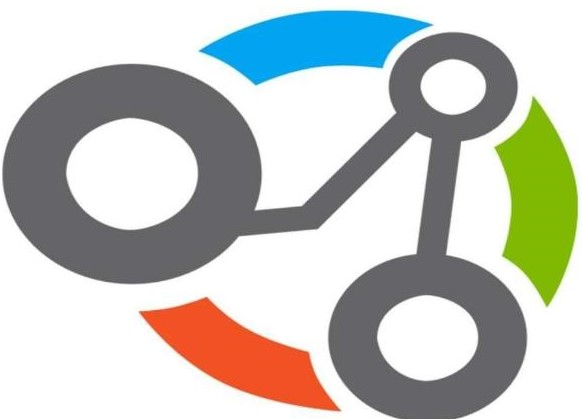

In [ ]:
#import our libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


Let's intialize a numpy array which contains [1,2,3,4,5] and print it and it's shape. We can use **np.array** for that.

In [ ]:
 ### write your code here ###
 import numpy as np
 a = np.array([1,2,3,4,5])
 ### your code ends here #### 
 print("The array contains " , a)
 print("The shape of the array is " , a.shape)

The array contains  [1 2 3 4 5]
The shape of the array is  (5,)


We can see that the array's shape is one dimention.What if we want to use it in matrix mutliplication?How can we do that?
Well,the answer is with **np.reshape** function.Let's implement it.

**Note that:**
              
              np.reshape takes two arguments:
                                      - first the array
                                      - second the new shape

In [ ]:
 ### write your code here ###
 import numpy as np
 a = np.array([1,2,3,4,5])
 a = np.arange(5).reshape(5,1)
 ### your code ends here ###
 assert(a.shape ==(5,1))
 print("The array's new shape is ", a.shape)

The array's new shape is  (5, 1)


Now we will try to multiply two matrices

**Note that:**

- we will use np.dot() function
- to multiply two matrices the columns number of the first   matrix must equal the rows number of the second

In [ ]:
 # intialize our matrices
 import numpy as np
 x = np.array([[2,4],[3,1],[1,5]])
 y = np.array([[1,1,1],[2,3,5]])

 ### write your code here ###
 z = np.dot(x,y)
 ### your code ends here ###
 assert(z.shape==(3,3))
 print("shape of the result is " , z.shape)

shape of the result is  (3, 3)


Now we want to slice our result matrix without for loop.

**Note that:**

- we can do that by type the matrix name and open square braces like that **z[,]** and type on the left of **,** number of rows and on the right  of **,** number of columns.
- if you type in rows that 1:3 it would pick first row and the second not the third.
- if you type :3 without a number before it, it would pick all the rows/columns before 3.
- if you type 1: without a number before it, it would pick all the rows/columns after 1. 
- if you type : without a number before it, it would pick all the rows/columns in the matrix

Let's run the following cell and see

In [ ]:
 import numpy as np
 x = np.array([[2,4],[3,1],[1,5]])
 y = np.array([[1,1,1],[2,3,5]])
 z = np.dot(x,y)
 # assert(z.shape==(3,3))
print("First two rows in the matrix are: " , z[0:2,:])
print("First two columns in the matrix are: " , z[:,:2])
print("All rows in the matrix and only one column are: " , z[:,:1])
print("The actual matrix is: " , z)

First two rows in the matrix are:  [[10 14 22]
 [ 5  6  8]]
First two columns in the matrix are:  [[10 14]
 [ 5  6]
 [11 16]]
All rows in the matrix and only one column are:  [[10]
 [ 5]
 [11]]
The actual matrix is:  [[10 14 22]
 [ 5  6  8]
 [11 16 26]]


Let's intialize an matrix of shape (2,2) by zeros we can use **np.zeros()** function for that it takes one argument and it's the shape of the matrix.

In [ ]:
 ### write your code here ###
 import numpy as np
 m = np.zeros([2,2])
 ### your code ends here ###
 assert(m.shape==(2,2))
 print(m)

[[0. 0.]
 [0. 0.]]


Let's intialize an matrix with the same shape as the previous but with random values between **[0,1]** . We can do that with **np.random.rand()** function and it takes the shape of the matrix only.

In [ ]:
 ### write your code here ###
 import numpy as np
 m = np.random.rand(2,2)
 ### your code ends here ###
 assert(m.shape==(2,2))
 print(m)

[[0.08258218 0.75603696]
 [0.23440366 0.34632797]]


Now let's upload our data set and load it in our code. 

**Note that:**

- We use a pandas function for that which is **pd.read_csv()** it takes our dataset file name as an argument

In [ ]:
  ### write your code here ###
  import pandas as pd
  titanic_dataset=pd.read_csv('titanic_data.csv')
  ### your code ends here ###
  titanic_dataset.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's see how many nulls in our dataset features

In [ ]:
titanic_dataset.isnull().sum()

We can see that we have three features with null values.How can we deal with that?

Let's first see the correlation between our features and survived which will be our prediction.


In [ ]:
#corr function is a function that calculate the correlation between our features
titanic_dataset.corr()

# **Do you notice something?**

yes,the function print the correlation for 7 features while we have more,Why is that?

Let's check our datatypes

In [ ]:
titanic_dataset.dtypes

We can see that there are five features are objects,So let's convert them to thier datatypes using **convert_dtypes()** function.

**Note that:**

- Convert_dtypes() is so smart when you call it it will convert each feature to their actual data type.

In [ ]:
titanic_dataset = titanic_dataset.convert_dtypes()
titanic_dataset.dtypes

We figure it out they are strings so we can not use it in correlation with our features, but what if there are features will affect our predictions like sex.

we can replace it with 0 for male and 1 for female or vice versa,can't we?

**Note that:**

- We can drop unnecessary features as name,ticket and cabin
- We can visualize on barplot using matplotlib to find out if embarked and sex will affect our prediction or not.

Run the following cell to see that

In [ ]:
plt = titanic_dataset.Sex.value_counts().sort_index().plot(kind ='bar') #plot a barplot between count of passengers and Sex
plt.set_xlabel('Sex') # set Sex feature on the x-axis
plt.set_ylabel('Passenger count') #set Passenger count on the y-axis


In [ ]:
plt = titanic_dataset.Embarked.value_counts().sort_index().plot(kind = 'bar') # plot a barplot between the count of passengers and Embarked
plt.set_xlabel('Embarked') # set embarked on x-axis
plt.set_ylabel('Passenger count') # set passenger count on y-axis

We can see that these two features will affect our predictions, So let's map them to numbers to make them meaningful for the computation.

**Note that:**

- Sex feature only have two values male/female we can map them to 0 and 1.
- Embarked feature only have three values C/Q/S we can map them to 0,1 and 2.


In [ ]:
titanic_dataset["Embarked"] = titanic_dataset["Embarked"].replace(['C','Q','S'],[0,1,2])
titanic_dataset["Sex"]=titanic_dataset["Sex"].replace(['female','male'],[0,1])
# Let's see our datatypes again
titanic_dataset = titanic_dataset.convert_dtypes()
titanic_dataset.dtypes

let's drop the unnecessary features which are name,ticket,passengerID and cabin(notice that cabin has too many nulls).

We will use **drop()** function.

**Note that:**

- We can use our function like that  **titanic_dataset.drop()** .
- drop function takes three arguments, First argument is features name that we will drop, Second argument is axis and we set it to 1 and third is boolean it's name is inplace we set it with true.

In [ ]:
 ### write your code here ###
 #titanic_dataset 
 ### your code ends here ###

Finally, let's fill the nulls in our two columns.

**Reminder:** 
- Age column contains 177 null values.
- embarked only contains 2 null values.

Let's try fill nulls in our age column by it's mean and our embarked column by it's mode.

**Note that:**

- We will use **fillna()** function.
- It takes two arguments the value that will replace the nulls and inplace and we will set it to true.

Run the following cell to replace the nulls in our dataset.


In [ ]:
titanic_dataset["Age"].fillna(titanic_dataset.Age.mean(),inplace=True)
titanic_dataset["Embarked"].fillna(titanic_dataset.Embarked.mode()[0],inplace=True)
titanic_dataset.head()

# Congratulations 

you have completed your first task.



 All credits goes to MSP ASU


---


Made by Omar Khaled


---


2021/2022